In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
diabetes = pd.read_csv('Diabetes_Data.csv')
diabetes.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [3]:
x = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']
x.shape, y.shape

((995, 2), (995,))

In [4]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns.values)
x.head()

,glucose,bloodpressure
0,0.4,0.70
1,0.4,0.84
2,0.5,0.26
3,0.5,0.60
4,0.4,0.46


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.80)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, stratify=y_test, train_size=0.5)
x_train.shape, x_test.shape, x_valid.shape, y_train.shape, y_test.shape, y_valid.shape


((796, 2), (99, 2), (100, 2), (796,), (99,), (100,))

<h1> Gaussian </h1>

In [6]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train)

GaussianNB()

In [7]:
gaussian_cv = cross_validate(estimator=gaussian_nb,
                             X=x_valid, y=y_valid,
                             scoring='accuracy', cv=5,
                             return_train_score=True)
gaussian_mean_train_score = round((gaussian_cv['train_score'] * 100).mean(), 3)
gaussian_mean_test_score = round((gaussian_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {gaussian_mean_train_score}')
print(f'Mean test score: {gaussian_mean_test_score}')

Mean train score: 96.0
Mean test score: 96.0


In [8]:
gaussian_predict = gaussian_nb.predict(x_test)
print(classification_report(y_test, gaussian_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        50

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



<h1> Bernoulli </h1>

In [9]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(x_train, y_train)

BernoulliNB()

In [10]:
bernoulli_cv = cross_validate(estimator=bernoulli_nb, 
                              X=x_valid, y=y_valid,
                             cv=5, return_train_score=True)
bernoulli_mean_train_score = round((bernoulli_cv['train_score'] * 100).mean(), 3)
bernoulli_mean_test_score = round((bernoulli_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {bernoulli_mean_train_score}')
print(f'Mean test score: {bernoulli_mean_test_score}')

Mean train score: 51.0
Mean test score: 50.0


In [11]:
bernoulli_predict = gaussian_nb.predict(x_test)
print(classification_report(y_test, bernoulli_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        50

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



<h1> Multinomial </h1>

In [12]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(x_train, y_train)

MultinomialNB()

In [13]:
multinomial_cv = cross_validate(estimator=multinomial_nb,
                               X=x_valid, y=y_valid,
                               cv=5, return_train_score=True)
multinomial_mean_train_score = round((multinomial_cv['train_score'] * 100).mean(), 3)
multinomial_mean_test_score = round((multinomial_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {multinomial_mean_train_score}')
print(f'Mean test score: {multinomial_mean_test_score}')

Mean train score: 84.75
Mean test score: 84.0


In [14]:
multinomial_predict = multinomial_nb.predict(x_test)
print(classification_report(y_test, multinomial_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88        49
           1       0.93      0.82      0.87        50

    accuracy                           0.88        99
   macro avg       0.88      0.88      0.88        99
weighted avg       0.88      0.88      0.88        99



<h1> Result </h1>

In [16]:
sns.set_theme(style='whitegrid')

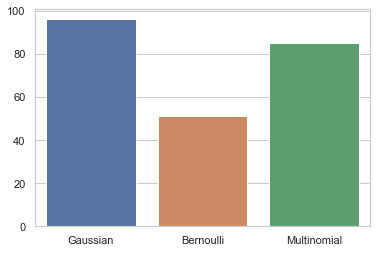

In [17]:
mean_train_scores = pd.DataFrame(data=[[gaussian_mean_train_score,
                                        bernoulli_mean_train_score,
                                        multinomial_mean_train_score]],
                                 columns=['Gaussian', 'Bernoulli', 'Multinomial'])
sns.barplot(data=mean_train_scores);